In [1]:
import sys
sys.path.append("..")
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# 追加 trial data のコピー用スクリプト
import shutil
# for name in ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY", "subset1", "poisson", "new_poisson"]:
for name in ["subset1", "poisson", "new_poisson"]:
    for model in ["DGCNN", "GIN", "Deepsets"]:
        for parent in glob(f"../log1/logs/{name}/{model}/*"):
            for copy_file in glob(f"{parent}/train_log/*"):
                copy_file_name = copy_file.replace("trial0", "trial2").replace("log1/logs", "logs")
                shutil.copy(copy_file, copy_file_name)
            for copy_file in glob(f"{parent}/model_weight/*"):
                copy_file_name = copy_file.replace("trial0", "trial2").replace("log1/logs", "logs")
                shutil.copy(copy_file, copy_file_name)

# train data 解析

In [84]:
p.split("/")[-1]

'shuffle_100_0.01'

In [2]:
i = 0
all_df = pd.DataFrame()
#########################################################
for name in ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY", "subset1", "poisson", "new_poisson", "new_parete"]:
    print("="*20)
    print(name)
    # concat csv
    i = 0
    df = pd.DataFrame()
    for k in glob(f"../logs/{name}/*"):
        model = k.split("/")[-1]
        if model in ["GIN", "DGCNN", "Deepsets"] and name in ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY"]:
            pass
        else:
            parent_paths = glob(f"../logs/{name}/{model}/*")
            print(model)
            for p in sorted(parent_paths):
                a = pd.DataFrame()
                for path in glob(p + "/train_log/*.csv"):
                    a = a.append(pd.read_csv(path))
                a.reset_index(inplace=True)
            
                # 3trailの平均値を計算
                k = a.groupby(["fold", "epoch"], as_index=False).mean()
                # 各foldの平均値と分散の変換
                epoch_average = k.groupby("epoch", as_index=False).mean()
                epoch_std = k.groupby("epoch", as_index=False).std()

                idx = epoch_average.val_acc.idxmax()
                max_acc = epoch_average.iloc[idx].val_acc
                std_acc = epoch_std.iloc[idx].val_acc

                print(f"{p.split('/')[-1]} : {round(max_acc * 100,1)} ± {round(std_acc * 100,1)}")

MUTAG
CNN
shuffle_18_0.001 : 81.3 ± 9.2
shuffle_18_0.01 : 76.1 ± 6.9
sort_18_0.001 : 86.9 ± 5.3
sort_18_0.01 : 83.6 ± 9.4
Deep_D1D2
shuffle_18_0.001 : 80.4 ± 9.9
shuffle_18_0.01 : 79.7 ± 10.2
sort_18_0.001 : 85.2 ± 9.1
sort_18_0.01 : 86.9 ± 3.8
BrainCNN
shuffle_18_0.001 : 75.4 ± 8.4
shuffle_18_0.01 : 72.2 ± 8.1
sort_18_0.001 : 84.1 ± 8.8
sort_18_0.01 : 78.4 ± 6.9
DD
CNN
shuffle_100_0.001 : 73.8 ± 4.6
shuffle_100_0.01 : 65.1 ± 6.1
sort_100_0.001 : 72.8 ± 3.6
sort_100_0.01 : 67.4 ± 7.3
Deep_D1D2
shuffle_100_0.001 : 75.9 ± 5.1
shuffle_100_0.01 : 70.4 ± 9.5
sort_100_0.001 : 74.9 ± 4.6
sort_100_0.01 : 71.1 ± 6.5
BrainCNN
shuffle_100_0.001 : 70.8 ± 4.5
shuffle_100_0.01 : 65.6 ± 4.2
sort_100_0.001 : 73.0 ± 5.5
sort_100_0.01 : 65.4 ± 5.7
COLLAB
CNN
shuffle_75_0.001 : 68.9 ± 1.8
shuffle_75_0.01 : 65.8 ± 2.7
sort_75_0.001 : 75.6 ± 1.4
sort_75_0.01 : 68.8 ± 5.3
Deep_D1D2
shuffle_75_0.001 : 66.4 ± 4.8
shuffle_75_0.01 : 50.9 ± 4.7
sort_75_0.001 : 69.7 ± 6.1
sort_75_0.01 : 54.9 ± 7.6
BrainCNN
shuffl

In [187]:
i = 0
all_df = pd.DataFrame()
#########################################################
for name in ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY", "subset1", "poisson", "new_poisson"]:
    print("="*20)
    print(name)
    # concat csv
    i = 0
    df = pd.DataFrame()
    
    for k in glob(f"../logs/{name}/*"):
        model = k.split("/")[-1]
        if model in ["GIN", "DGCNN", "Deepsets"] and name in ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY"]:
            pass
        else:
            parent_paths = glob(f"../logs/{name}/{model}/*")

            for p in sorted(parent_paths):
                a = pd.DataFrame()
                for path in glob(p + "/train_log/*.csv"):
                    a = a.append(pd.read_csv(path))
                a.reset_index(inplace=True)

                # print("="*20)
                # print(p.split("/")[-1])
                sort, resize, lr = p.split("/")[-1].split("_")

                for e in range(1, 50, 1):
                    same_epoch = a.query("epoch==@e")
                    ave_val_acc = same_epoch["val_acc"].mean()
                    std_val_acc = same_epoch["val_acc"].std()
                    # print(f"epoch {e+1} : {round(ave_val_acc*100, 2)} ± {round(std_val_acc*100, 2)}")

                    df = df.append(
                        pd.Series({"model": model, "sort": sort, "resize": int(resize), "lr": float(lr),
                         "epoch": e, "ave_acc": ave_val_acc, "std_acc": std_val_acc
                        }, name=i)
                    )

                    i+=1

    ###################################################
    # search max value
    max_df = pd.DataFrame()

    g = df.groupby(["model", "sort"])
    for _, d in g:
        max_acc = d["ave_acc"].max()
        max_data = d.query("ave_acc==@max_acc").iloc[0]
    #     print(name, f"{round(max_data.ave_acc*100,2)} ± {round(max_data.std_acc*100,2)}")
        max_df = max_df.append(max_data)
    max_df.reset_index(inplace=True)

    for i in max_df.iterrows():
        print(i[1].model, i[1].sort, f"{round(i[1].ave_acc*100,1)} ± {round(i[1].std_acc*100, 1)}")
    
    max_df["name"] = [name for _ in range(len(max_df))]
    all_df = pd.concat([all_df, max_df])

MUTAG
BrainCNN shuffle 78.2 ± 7.8
BrainCNN sort 84.6 ± 8.0
CNN shuffle 84.1 ± 9.2
CNN sort 87.8 ± 4.9
Deep3 shuffle 84.1 ± 8.1
Deep3 sort 87.3 ± 5.1
Deep5 shuffle 83.5 ± 8.0
Deep5 sort 87.3 ± 5.7
Deep7 shuffle 83.6 ± 8.3
Deep7 sort 86.8 ± 5.6
Deep_D1D2 shuffle 80.9 ± 7.9
Deep_D1D2 sort 85.1 ± 7.0
Deep_D1D2_noAttention shuffle 84.1 ± 7.0
Deep_D1D2_noAttention sort 85.2 ± 10.7
Only_E2E shuffle 80.9 ± 7.0
Only_E2E sort 87.3 ± 7.5
layer1_attention_complex shuffle 81.0 ± 13.8
layer1_attention_complex sort 87.8 ± 6.1
layer1_attention_simple shuffle 83.0 ± 8.5
layer1_attention_simple sort 85.7 ± 12.1
layer2_attention_complex shuffle 78.3 ± 13.0
layer2_attention_complex sort 88.9 ± 5.8
layer2_attention_simple shuffle 84.1 ± 8.5
layer2_attention_simple sort 87.8 ± 6.1
DD
BrainCNN shuffle 73.5 ± 4.3
BrainCNN sort 75.3 ± 5.9
CNN shuffle 76.2 ± 5.8
CNN sort 75.2 ± 5.8
Deep3 shuffle 76.2 ± 4.4
Deep3 sort 76.1 ± 4.4
Deep5 shuffle 76.3 ± 4.2
Deep5 sort 75.9 ± 5.6
Deep7 shuffle 76.8 ± 4.7
Deep7 sort 7

In [183]:
all_df.model.unique()

array(['BrainCNN', 'CNN', 'Deep3', 'Deep5', 'Deep7', 'Deep_D1D2',
       'Deep_D1D2_noAttention', 'Only_E2E', 'layer1_attention_complex',
       'layer1_attention_simple', 'layer2_attention_complex',
       'layer2_attention_simple', 'DGCNN', 'Deepsets', 'GIN'],
      dtype=object)

In [201]:
gnn_names = ["DGCNN", "Deepsets", "GIN"]
all_df = all_df.query("model not in @gnn_names")

In [224]:
sort_order = ['CNN', 'BrainCNN', 'Deep3', 'Deep5', 'Deep7', 'Only_E2E', 'Deep_D1D2', 'Deep_D1D2_noAttention',
             'layer1_attention_simple', 'layer1_attention_complex',
            'layer2_attention_simple', 'layer2_attention_complex']

all_df["categorical_model"] = pd.Categorical(all_df["model"], categories = sort_order)

sort_order = ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY", "subset1", "poisson", "new_poisson"]
all_df["categorical_name"] = pd.Categorical(all_df["name"], categories = sort_order)

all_df = all_df.sort_values(by=["categorical_model", "categorical_name"])

In [227]:
def add_line(ax, name):
    gnn = {"MUTAG": 0.894, "DD": 0.794, "COLLAB": 0.802, "REDDIT-BINARY": 0.924, "subset1": 0.993, "poisson": 0.987, "new_poisson": 0.942}
    baseline = {"DD": 0.784, "COLLAB": 0.702, "REDDIT-BINARY": 0.822, "subset1": 0.994, "poisson": 0.832, "new_poisson": 0.952}
    
    ax.axhline(y=gnn[name], xmin=-1, xmax=10, label="top-gnn",color="b")
    if name != "MUTAG":
        ax.axhline(y=baseline[name], xmin=-1, xmax=10, label="baseline",color="r")
    ax.set_xlim(-.5, 12)
    ax.set_xticklabels(labels=["CNN", "Brain", "D3", "D5", "D7", "E2E", "D1D2", "D1D2_no",
                               "L1-simple", "L1-complex", "L2-simple", "L2-complex"],rotation=45)

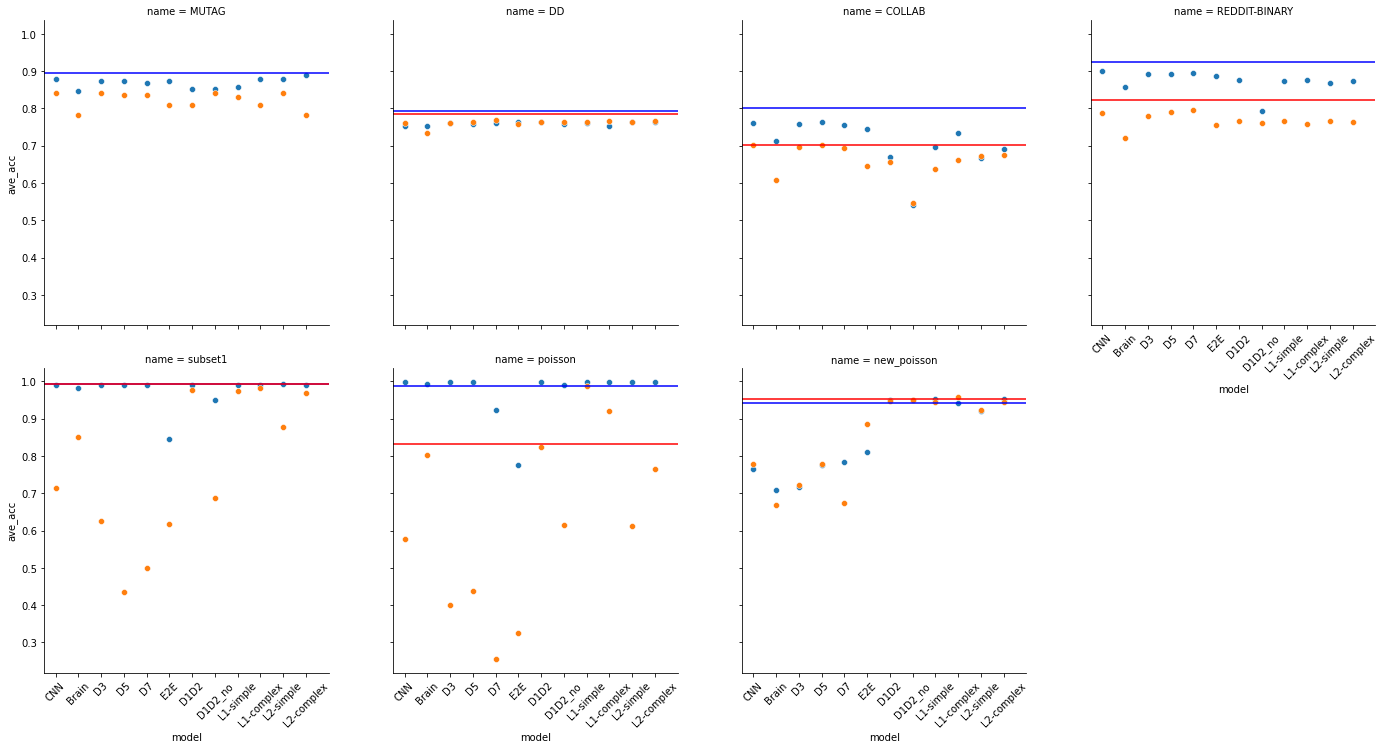

In [228]:

g = sns.FacetGrid(all_df, col="name", hue="sort", height=5, col_wrap=4)
g.map(sns.scatterplot, "model", "ave_acc")

axes = g.fig.axes
for i, name in enumerate(["MUTAG", "DD", "COLLAB", "REDDIT-BINARY", "subset1", "poisson", "new_poisson"]):
    add_line(axes[i], name)

In [79]:
#########################################################
model = "Deep_D1D2"
i = 0
df = pd.DataFrame()
for name in ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY", "poisson", "new_poisson", "subset1"]:
    parent_paths = glob(f"../logs/{name}/{model}/*")

    for p in sorted(parent_paths):
        a = pd.DataFrame()
        for path in glob(p + "/train_log/*.csv"):
            a = a.append(pd.read_csv(path))
        a.reset_index(inplace=True)

        # print("="*20)
        # print(p.split("/")[-1])
        sort, resize, lr = p.split("/")[-1].split("_")
        
        
        max_acc = 0
        for e in range(1,50):
            
            same_epoch = a.query("epoch==@e")
            ave_val_acc = same_epoch["val_acc"].mean()
            std_val_acc = same_epoch["val_acc"].std()
            
            max_acc = max(max_acc, ave_val_acc)
            
            df = df.append(
                pd.Series({"name": name, "model": model, "sort": sort, "resize": int(resize), "lr": float(lr),
                 "epoch": e, "ave_acc": ave_val_acc, "std_acc": std_val_acc
                }, name=i)
            )
            i+=1

poisson


In [102]:
df

,name,model,sort,resize,lr,epoch,ave_acc,std_acc
0,MUTAG,Deep_D1D2,shuffle,18.0,0.001,1.0,0.628655,0.133759
1,MUTAG,Deep_D1D2,shuffle,18.0,0.001,2.0,0.628655,0.133759
2,MUTAG,Deep_D1D2,shuffle,18.0,0.001,3.0,0.665497,0.076487
3,MUTAG,Deep_D1D2,shuffle,18.0,0.001,4.0,0.665497,0.076487
4,MUTAG,Deep_D1D2,shuffle,18.0,0.001,5.0,0.665497,0.076487
...,...,...,...,...,...,...,...,...
1367,subset1,Deep_D1D2,sort,100.0,0.010,45.0,0.249750,0.009376
1368,subset1,Deep_D1D2,sort,100.0,0.010,46.0,0.251200,0.007631
1369,subset1,Deep_D1D2,sort,100.0,0.010,47.0,0.249550,0.009968
1370,subset1,Deep_D1D2,sort,100.0,0.010,48.0,0.250350,0.008141


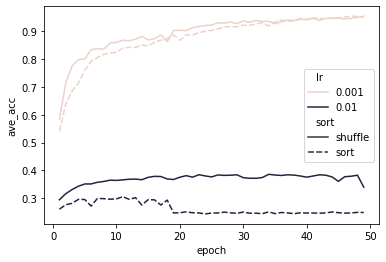

In [105]:
sns.lineplot(x="epoch", y="ave_acc", data=df.query("name=='new_poisson'"), hue="lr", style="sort")

In [48]:
import networkx as nx
import numpy as np
from tqdm import tqdm

In [112]:
df = pd.DataFrame()
i = 0
for kind in ["BA", "Growth", "Attach", "Random"]:
    paths = glob(f"../graph_data/new_poisson/graph/{kind}/*")
    for p in tqdm(paths):
        G = nx.read_adjlist(p)
        ave_degs = np.average([d[1] for d in list(G.degree())])
        num_edge = nx.number_of_edges(G)
        num_node = nx.number_of_nodes(G)   
        df = df.append(pd.Series({"kind":kind,"node" : num_node, "edges": num_edge, "ave_deg": ave_degs}, name=i))
        i+=1

100%|██████████| 5000/5000 [00:14<00:00, 352.19it/s]


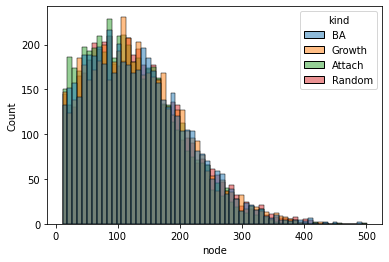

In [113]:
sns.histplot(x="node",data=df,hue="kind")

In [115]:
df["node"].max()

501.0

In [234]:
name = "MUTAG"
model_name = "CNN"

log_files = glob(f"../logs/{name}/{model_name}/*")

In [240]:
csv_paths = glob(trainlog_files[0] + "/train_log/*.csv")

In [251]:
all_logs = pd.DataFrame()
for path in csv_paths:
    df = pd.read_csv(path)
    df = df.groupby()
    all_logs = pd.concat([all_logs, df])

In [253]:
all_logs

,fold,epoch,train_loss,train_acc,val_loss,val_acc
0,7.0,0.0,0.781044,0.497041,0.691864,0.578947
1,7.0,1.0,0.671179,0.674556,0.687575,0.578947
2,7.0,2.0,0.582623,0.674556,0.785184,0.578947
3,7.0,3.0,0.640616,0.674556,0.673814,0.578947
4,7.0,4.0,0.621017,0.674556,0.668655,0.578947
...,...,...,...,...,...,...
45,5.0,45.0,0.010698,0.994083,1.218937,0.789474
46,5.0,46.0,0.010435,0.994083,1.254388,0.789474
47,5.0,47.0,0.010392,0.994083,1.298099,0.789474
48,5.0,48.0,0.010422,0.994083,1.347980,0.789474


In [246]:
df_mean = all_logs.groupby([,"epoch"]).mean()

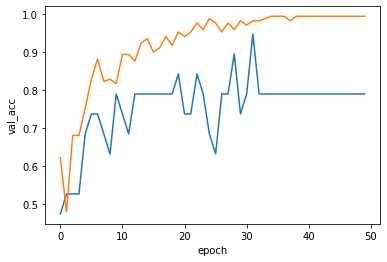

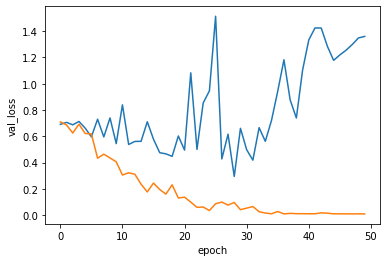

In [250]:
sns.lineplot(x="epoch", y="val_acc", data=df_mean)
sns.lineplot(x="epoch", y="train_acc", data=df_mean)
plt.show()
sns.lineplot(x="epoch", y="val_loss", data=df_mean)
sns.lineplot(x="epoch", y="train_loss", data=df_mean)